In [27]:
import pandas as pd
from gaAPI import *
import matplotlib.pyplot as plt

In [68]:
import cufflinks as cf

In [42]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [19]:
gaView = ""
start_date = '2019-01-01'
end_date = '2019-11-30'
metrics = [{"expression": "ga:users"}]
dimensions = [{'name': 'ga:userType'}, {"name": "ga:segment"}]
segments = [{"segmentId": ""}]
CLIENT_SECRETS_PATH = 'client_secret.json'

group_by = []

In [31]:
# Initiate the analytics client
analytics = initialize_analyticsreporting(CLIENT_SECRETS_PATH)

In [21]:
result = get_report(analytics, start_date, end_date, gaView, metrics, dimensions, segments)

In [22]:
result

{u'reports': [{u'columnHeader': {u'dimensions': [u'ga:userType',
     u'ga:segment'],
    u'metricHeader': {u'metricHeaderEntries': [{u'name': u'ga:users',
       u'type': u'INTEGER'}]}},
   u'data': {u'isDataGolden': True,
    u'maximums': [{u'values': [u'37297']}],
    u'minimums': [{u'values': [u'11387']}],
    u'rowCount': 2,
    u'rows': [{u'dimensions': [u'New Visitor', u'All Users'],
      u'metrics': [{u'values': [u'37297']}]},
     {u'dimensions': [u'Returning Visitor', u'All Users'],
      u'metrics': [{u'values': [u'11387']}]}],
    u'totals': [{u'values': [u'48684']}]}}]}

In [23]:
df = pd.DataFrame(print_response(result))

In [24]:
df

,ga:segment,ga:userType,ga:users
0,All Users,New Visitor,37297
1,All Users,Returning Visitor,11387


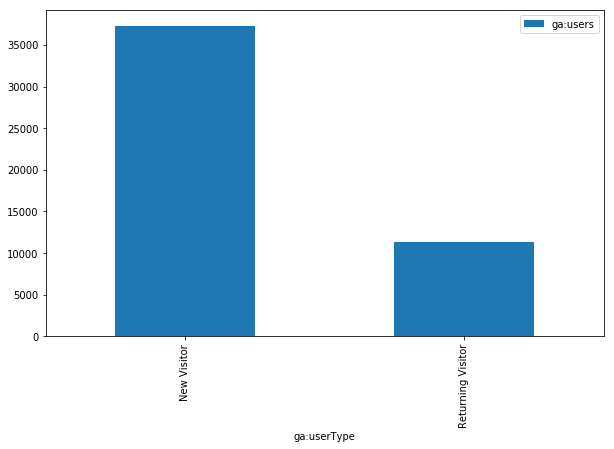

In [29]:
df.plot.bar(x='ga:userType', y=['ga:users'], ylim=[0,None], figsize=[10, 6])

In [26]:
df.to_csv('result.csv')

In [109]:
gaView = ""
start_date = '2019-01-01'
end_date = '2019-01-31'
metrics = [{"expression": "ga:users"}]
dimensions = [{'name': 'ga:source'}, {"name": "ga:dayOfWeek"}, {"name": "ga:segment"}]
segments = [{"segmentId": ""}]
CLIENT_SECRETS_PATH = 'client_secret.json'

result = get_report(analytics, start_date, end_date, gaView, metrics, dimensions, segments)

df = pd.DataFrame(print_response(result))

In [110]:
df

,ga:dayOfWeek,ga:segment,ga:source,ga:users
0,0,New Users,(direct),5
1,1,New Users,(direct),4
2,2,New Users,(direct),119
3,3,New Users,(direct),44
4,4,New Users,(direct),98
5,5,New Users,(direct),7
6,2,New Users,be_emailverif,1
7,5,New Users,be_emailverif,1
8,4,New Users,be_welcome,1
9,5,New Users,be_welcome,1


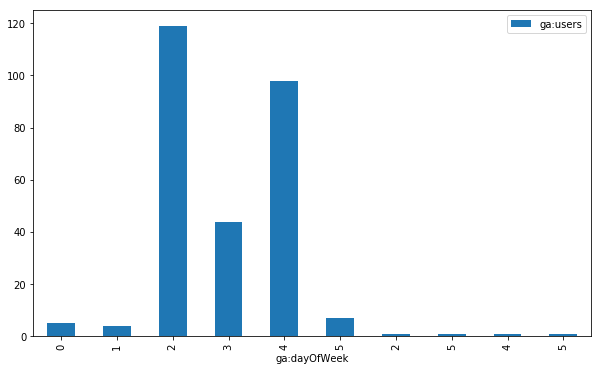

In [111]:
df.plot(kind='bar', x='ga:dayOfWeek', y=['ga:users'], ylim=[0,None], figsize=[10, 6])

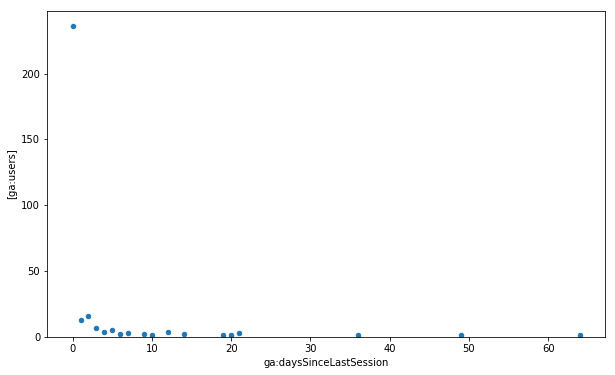

In [97]:
gaView = ""
start_date = '2019-01-01'
end_date = '2019-01-31'
metrics = [{"expression": "ga:users"}]
dimensions = [{'name': 'ga:daysSinceLastSession'}, {"name": "ga:segment"}]
segments = [{"segmentId": ""}]

result = get_report(analytics, start_date, end_date, gaView, metrics, dimensions, segments)

df = pd.DataFrame(print_response(result))

df['ga:daysSinceLastSession'] = df['ga:daysSinceLastSession'].astype(str).astype(int)

df.plot(kind='scatter', x='ga:daysSinceLastSession', y=['ga:users'], ylim=[0,None], figsize=[10, 6])

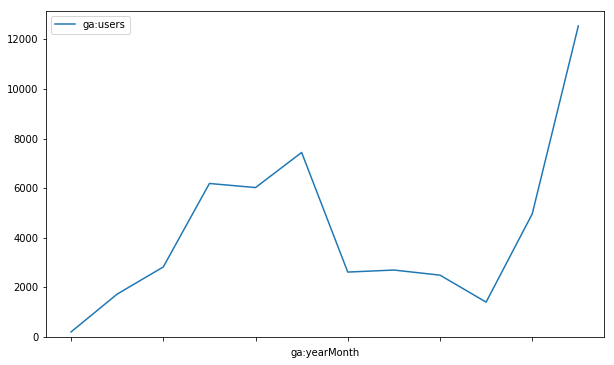

In [41]:
gaView = ""
start_date = '2019-01-01'
end_date = '2019-12-31'
metrics = [{"expression": "ga:users"}]
dimensions = [{'name': 'ga:yearMonth'}, {"name": "ga:segment"}]
segments = [{"segmentId": ""}]

result = get_report(analytics, start_date, end_date, gaView, metrics, dimensions, segments)

df = pd.DataFrame(print_response(result))

df.plot.line(x='ga:yearMonth', y=['ga:users'], ylim=[0,None], figsize=[10, 6])

In [52]:
df['ga:users'].max()

12544

In [54]:
@interact
def show_users(column = ['ga:users'], x = (0, 12544, 10)):
    return df.loc[df[column] > x]

aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnY29sdW1uJywgb3B0aW9ucz0oJ2dhOnVzZXJzJywpLCB2YWx1ZT0nZ2E6dXNlcnMnKSwgSW50U2xpZGVyKHZhbHXigKY=
